## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv('Position_Salaries.csv')

In [26]:
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:,-1].values


In [27]:
y = y.reshape(len(y),1)

## Feature Scaling

In [28]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

#x = sc.transform()

In [29]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [30]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [31]:
from sklearn.svm import SVR
regressor =  SVR(kernel= 'rbf')
regressor.fit(X,y)

/home/d3evil4/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

## Predicting a new results

In [32]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])))

array([170370.0204065])

## Visualising the SVR results

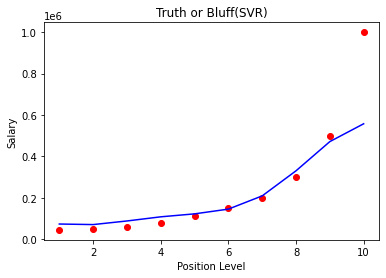

In [42]:
plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y) ,color = 'red')
plt.plot(sc_X.inverse_transform(X) , sc_y.inverse_transform(regressor.predict(X)), color = 'blue')
plt.title('Truth or Bluff(SVR)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Visualising The SVR results(for higher resolution and smoother curve)

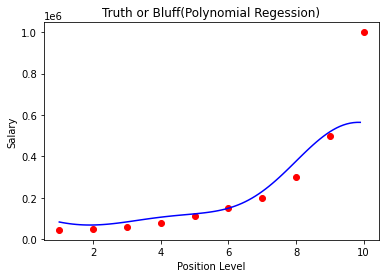

In [49]:
x_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y) ,color = 'red')
plt.plot(x_grid,sc_y.inverse_transform(regressor.predict(sc_X.fit_transform(x_grid))), color='blue')
plt.title('Truth or Bluff(Polynomial Regession)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()